<a href="https://colab.research.google.com/github/jeffersonsps61/Desafio-de-Processamento-de-Sinais-Bidimensionais/blob/main/Jefferson_Santos_Desafios_Modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escreva um programa em Python que utilize o OpenCV para contar o número de colonias de bactéria existentes nas 3 imagens disponibilizadas. Faça com que cada elemento seja representado com uma cor diferente na imagem de saída.

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
# Importtando as bibliotecas necessárias
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [342]:
#lendo as imagens
imagem_um = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-01.tif')
imagem_dois = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-02.tif')
imagem_tres = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-03.tif')

Total de objetos encontrados: 11


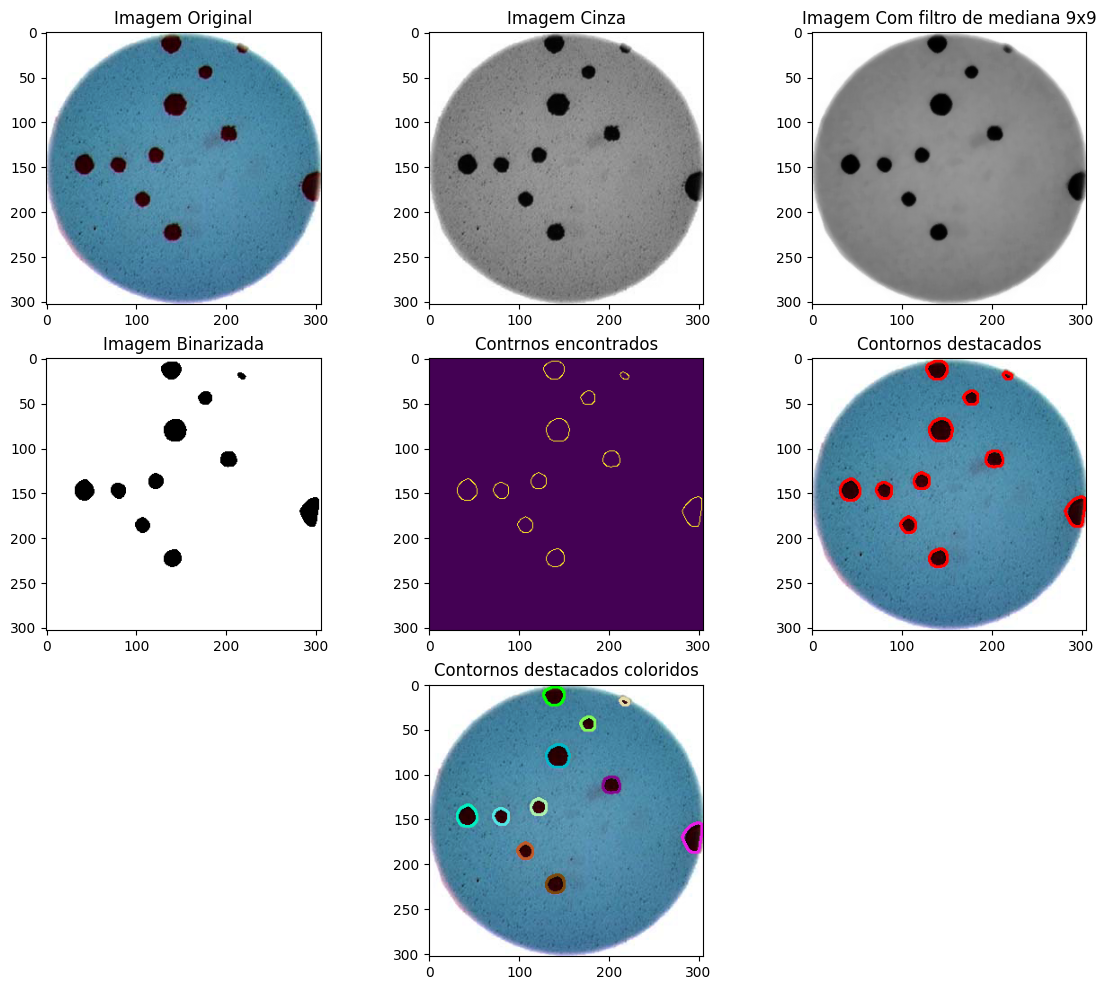

In [343]:
import cv2
import numpy as np

imgColorida = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-01.tif')
imgCopia = imgColorida.copy() # Cópia para desenhar os contornos

# 2. Converter para tons de cinza
imgGray = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2GRAY)

# 3. Aplicar filtro Gaussiano (para suavizar/remover ruído)

#imgSuave = cv2.GaussianBlur(imgGray, (5,5), 0)
imgSuave = cv2.medianBlur(imgGray, 7)
#imgbordas = cv2.Canny(imgSuave, 100, 200)

# 4. Definindo o método de binarização.
T_usado, imgBinarizada = cv2.threshold (imgSuave, 100, 200, cv2.THRESH_BINARY)


# 5. Encontrando os contornos
imgContornos = imgBinarizada.copy()
imgContornos = cv2.Canny(imgContornos,70, 200)

contornos, hierarquia = cv2.findContours(
    imgContornos,
    cv2.RETR_EXTERNAL,        # Modo: Recupera apenas contornos externos (mais simples) [4]
    cv2.CHAIN_APPROX_SIMPLE   # Método: Comprime segmentos, retorna apenas os pontos finais [8, 9]
)


# 7. Plotando tudo

plt.figure(figsize=(14,12))


plt.subplot(331)
plt.imshow(imgColorida)
plt.title('Imagem Original')

plt.subplot(332)
plt.imshow(imgGray, cmap='gray')
plt.title('Imagem Cinza')

plt.subplot(333)
plt.imshow(imgSuave, cmap='gray')
plt.title('Imagem Com filtro de mediana 9x9')

plt.subplot(334)
plt.imshow(imgBinarizada, cmap='gray')
plt.title('Imagem Binarizada')

plt.subplot(335)
plt.imshow(imgContornos)
plt.title('Contrnos encontrados')

plt.subplot(336)
plt.imshow(cv2.drawContours(imgColorida, contornos, -1, (255, 0, 0), 2))
plt.title('Contornos destacados')

plt.subplot(338)
plt.title('Contornos destacados coloridos')
imgComContornosAleatorios = imgColorida.copy()

# 6.colorindo os contornos
for c in contornos:
  B = np.random.randint(0, 256)
  G = np.random.randint(0, 256)
  R = np.random.randint(0, 256)

  cor_aleatoria = (int(B), int(G), int(R))
  plt.imshow(cv2.drawContours(imgComContornosAleatorios, [c], -1, cor_aleatoria, 2))
# [c] = for c in contornos

total_objetos = len(contornos)
print(f"Total de objetos encontrados: {total_objetos}")

--- Processando Imagem 1: /content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-01.tif ---
Total de objetos encontrados: 11


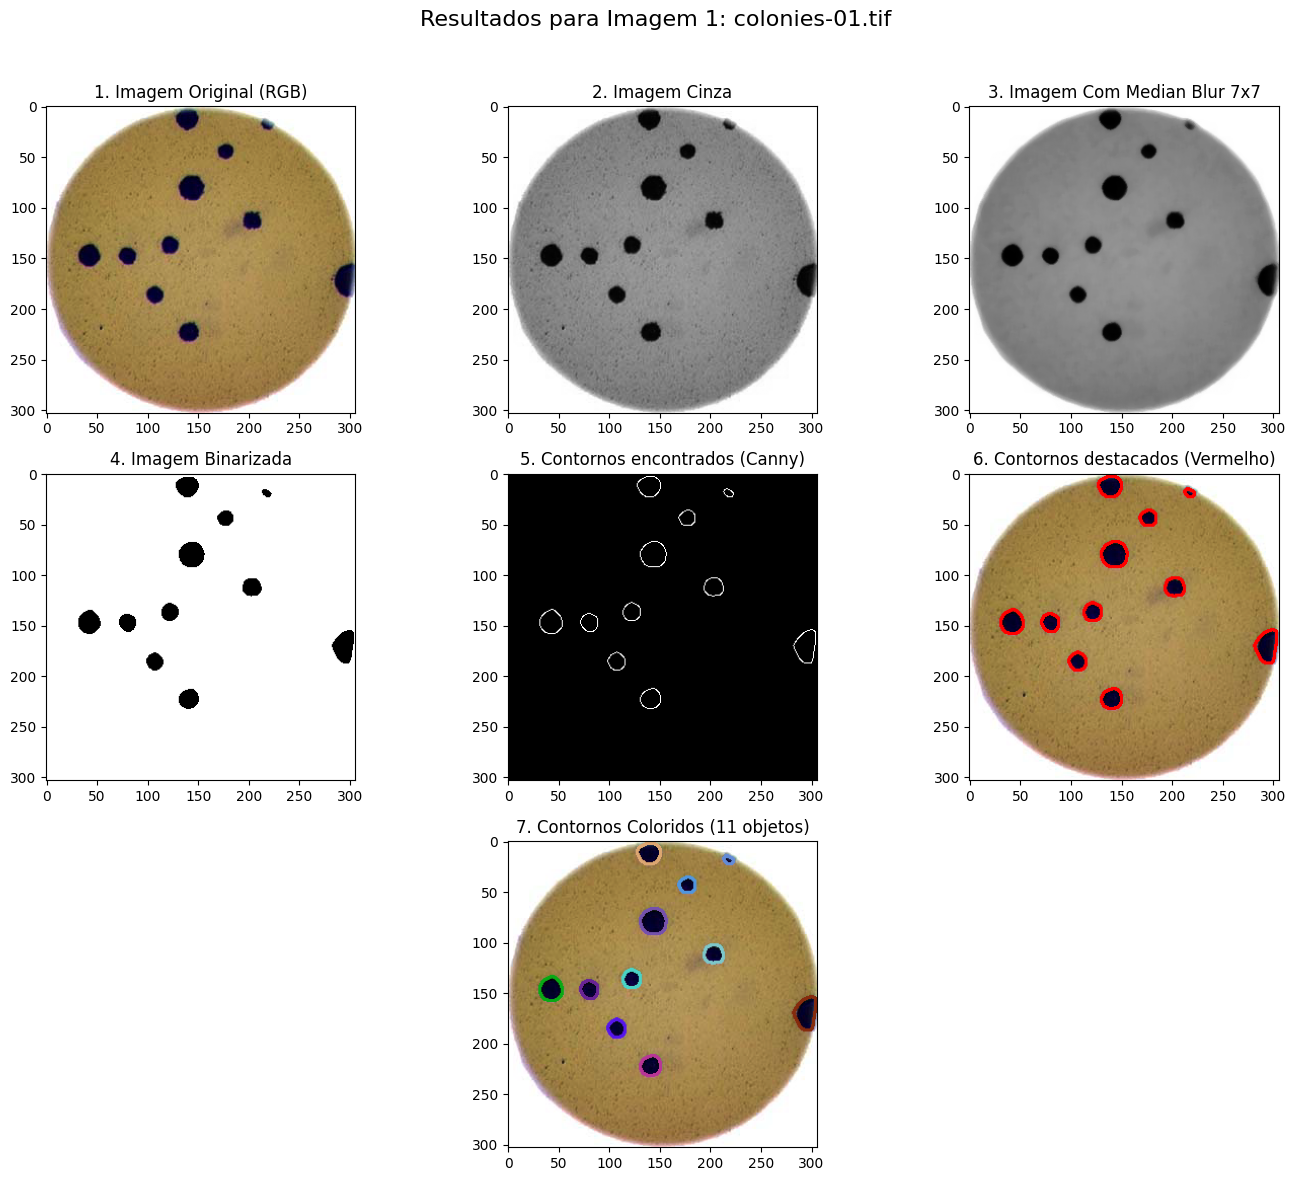

--- Processando Imagem 2: /content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-02.tif ---
Total de objetos encontrados: 61


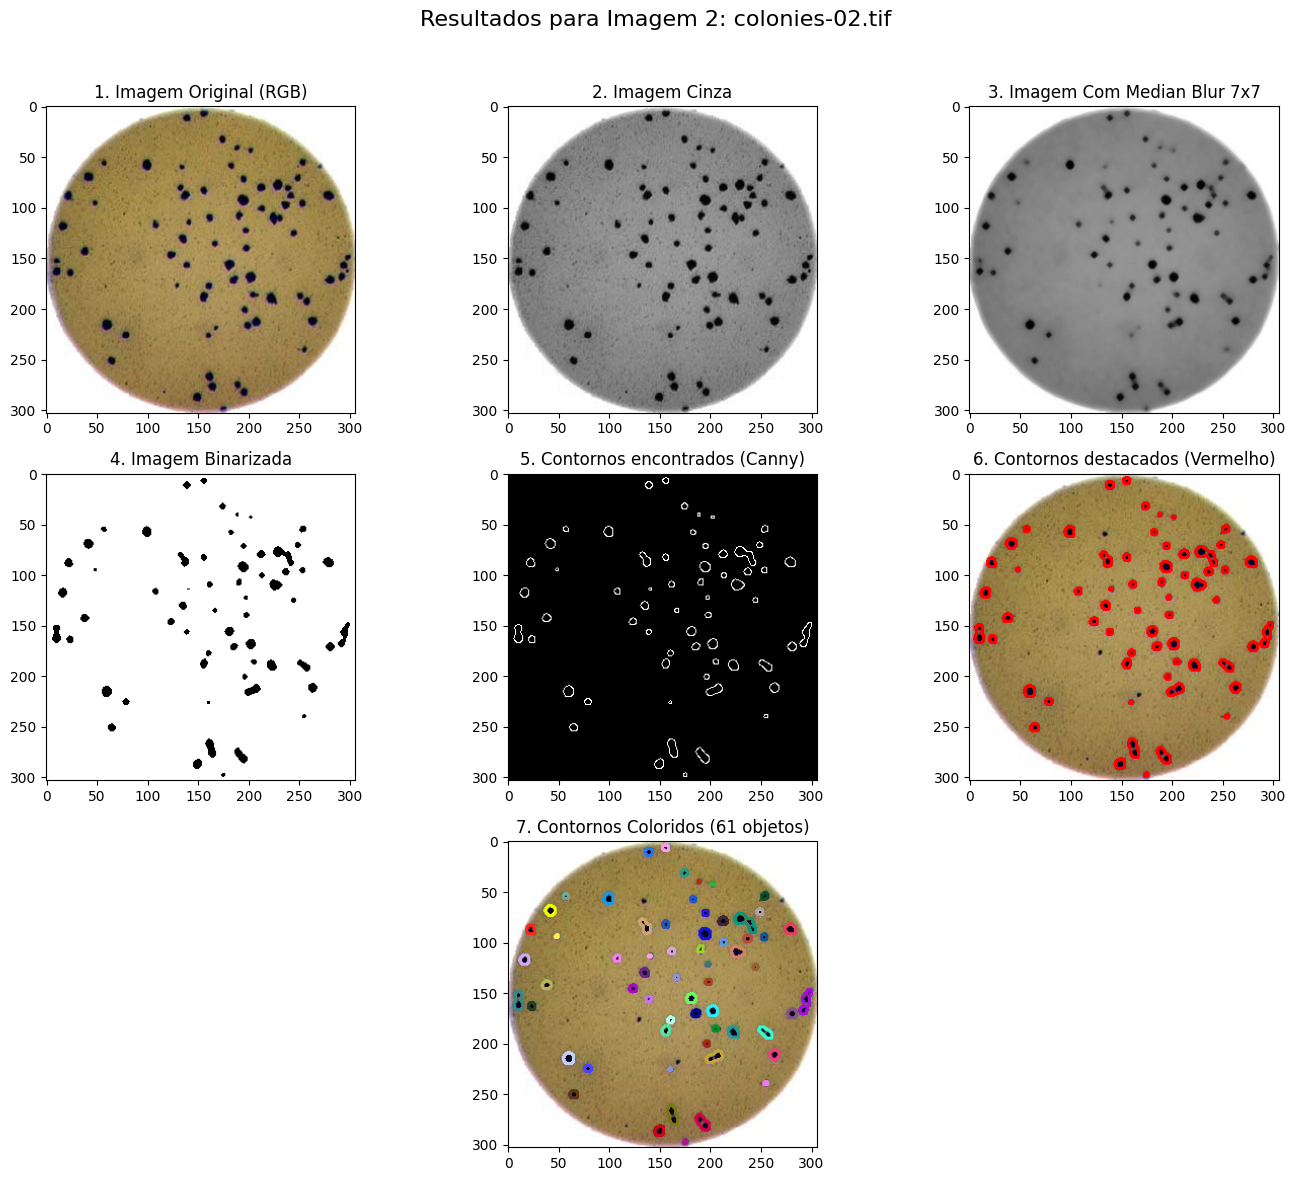

--- Processando Imagem 3: /content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-03.tif ---
Total de objetos encontrados: 175


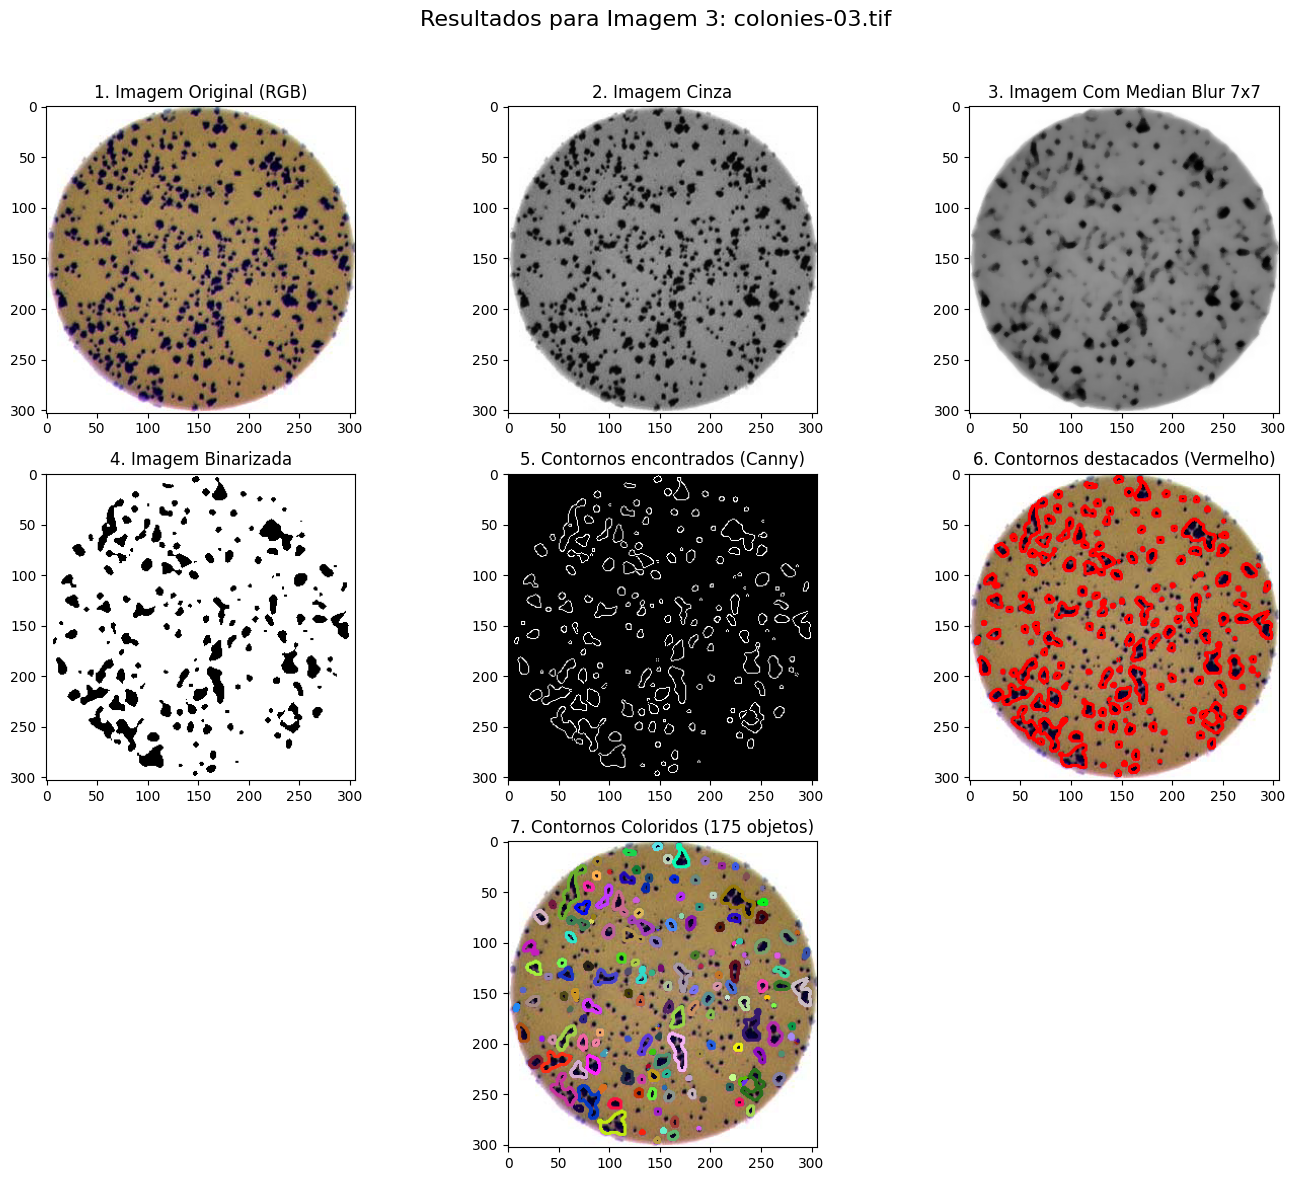

In [344]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir os caminhos das imagens (EXEMPLO)
# ***Você deve substituir estes caminhos pelos caminhos reais dos seus arquivos.***
caminho_um = '/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-01.tif'
caminho_dois = '/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-02.tif'
caminho_tres = '/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/colonies-03.tif'

# Lista de caminhos das imagens
imagens_caminhos = [caminho_um, caminho_dois, caminho_tres]

# Início do loop para processar cada imagem
for i, img_caminho in enumerate(imagens_caminhos):
    print(f"--- Processando Imagem {i+1}: {img_caminho} ---")

    # Tenta carregar a imagem
    imgColorida = cv2.imread(img_caminho)

    # Verifica se a imagem foi carregada
    if imgColorida is None:
        print(f"ERRO: Não foi possível carregar a imagem em: {img_caminho}. Pulando.")
        continue # Pula para a próxima iteração do loop

    # Conversão para RGB para exibição correta no Matplotlib
    imgColorida_rgb = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2RGB)

    # 2. Converter para tons de cinza
    imgGray = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2GRAY)

    # 3. Aplicar filtro (Median Blur)
    imgSuave = cv2.medianBlur(imgGray, 7)

    # 4. Definindo o método de binarização.
    # AJUSTE: Mudei o valor máximo de 200 para 255 (máximo do pixel).
    T_usado, imgBinarizada = cv2.threshold(imgSuave, 100, 255, cv2.THRESH_BINARY)

    # 5. Encontrando os contornos
    imgContornosCanny = cv2.Canny(imgBinarizada.copy(), 70, 200)

    contornos, hierarquia = cv2.findContours(
        imgContornosCanny,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )

    total_objetos = len(contornos)
    print(f"Total de objetos encontrados: {total_objetos}")

    # --- Preparações para o Plot ---
    # Cópia para desenhar todos os contornos (em vermelho)
    imgContornosGeral = imgColorida_rgb.copy()
    # Cópia para desenhar contornos com cores aleatórias
    imgComContornosAleatorios = imgColorida_rgb.copy()

    # 6. Colorindo os contornos aleatoriamente
    for c in contornos:
        # Gera uma cor aleatória em formato RGB para o Matplotlib
        R = np.random.randint(0, 256)
        G = np.random.randint(0, 256)
        B = np.random.randint(0, 256)
        cor_aleatoria_rgb = (int(R), int(G), int(B))

        # Desenha o contorno 'c' na imagem de contornos aleatórios
        # Não usamos o plt.imshow() aqui, apenas o drawContours para modificar a imagem.
        cv2.drawContours(imgComContornosAleatorios, [c], -1, cor_aleatoria_rgb, 2)

    # --- 7. Plotando tudo para a IMAGEM ATUAL ---

    plt.figure(figsize=(14, 12))
    plt.suptitle(f'Resultados para Imagem {i+1}: {img_caminho.split("/")[-1]}', fontsize=16)

    # Subplot 1: Imagem Original
    plt.subplot(331)
    plt.imshow(imgColorida_rgb)
    plt.title('1. Imagem Original (RGB)')

    # Subplot 2: Imagem Cinza
    plt.subplot(332)
    plt.imshow(imgGray, cmap='gray')
    plt.title('2. Imagem Cinza')

    # Subplot 3: Imagem Suavizada
    plt.subplot(333)
    plt.imshow(imgSuave, cmap='gray')
    plt.title('3. Imagem Com Median Blur 7x7')

    # Subplot 4: Imagem Binarizada
    plt.subplot(334)
    plt.imshow(imgBinarizada, cmap='gray')
    plt.title('4. Imagem Binarizada')

    # Subplot 5: Contornos encontrados (Canny)
    plt.subplot(335)
    plt.imshow(imgContornosCanny, cmap='gray')
    plt.title('5. Contornos encontrados (Canny)')

    # Subplot 6: Contornos destacados (Todos em Vermelho)
    plt.subplot(336)
    # imgContornosGeral já é RGB
    cv2.drawContours(imgContornosGeral, contornos, -1, (255, 0, 0), 2)
    plt.imshow(imgContornosGeral)
    plt.title('6. Contornos destacados (Vermelho)')

    # Subplot 8: Contornos com cores aleatórias
    plt.subplot(338)
    plt.imshow(imgComContornosAleatorios)
    plt.title(f'7. Contornos Coloridos ({total_objetos} objetos)')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta layout, deixando espaço para o suptitle
    plt.show() # Exibe a figura completa para esta imagem

Escreva um programa em Python que utilize o OpenCV para contar o número de elementos existentes na imagem Parafusos001. Destaque cada um deles com cores aleatórios como no desafio anterior.

Desafio-2: Fazer a contagem de cada tipo de elemento utilizando características ou técnicas diferentes de processamento.

In [345]:
parafuso = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Desafio de OPENCV/parafusos001.bmp')